# Using pyobis to query for known datasets

Created: 2022-11-23

Updated: 2022-11-23


Author: [Mathew Biddle](mailto:mathew.biddle@noaa.gov)

This notebook uses the [pyobis](https://github.com/iobis/pyobis) Python package to query the [OBIS API](https://api.obis.org/) for occurrences associated with specific datasets.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import pyobis
#import datashader
import geopandas

Initializing the known list of associated dataset ID's.

Or, a known institution. US MBON - https://obis.org/institute/23070

In [3]:
# dataset_ids = ['c9aaa0e9-8f6c-4553-a014-a857baba0680',
#  '2ae2a2bd-8412-405b-8a9f-b71adc41d4c5',
#  'a54a77db-7b42-4101-8d71-1adec3dd4ed5',
#  '36693923-2abf-4237-8154-8016f32844a0',
#  '731e318c-d692-4d6b-b4cc-edff0d385098',
#  '230e0287-79c3-47f0-9aed-718b63c0a074',
#  'fca3b113-b145-446c-a23c-3188090e43af',
#  '52f99f08-fc90-4684-aea8-a015150968ea',
#  'fbf4cb59-cef3-43be-b0ab-0dbab5f51740',
#  '438b8f02-3421-4b2c-a5b2-5934ab76f47b',
#  '62125eda-53d3-41bd-ae1f-1b7e0cda2963',
#  '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
#  'd32266b4-d98d-4eed-8207-57dff1f14cc4',
#  'ab06f0c6-3de3-447a-b339-a8517f2c95ed',
#  'cfceb150-bbe2-4efb-8682-14cfc7167e7c',
#  'afef5da2-614b-4208-aee6-c2413ed5ab76',
#  '62b97724-da17-4ca7-9b26-b2a22aeaab51',
#  'fbf4cb59-cef3-43be-b0ab-0dbab5f51740',
#  '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
#  'cfceb150-bbe2-4efb-8682-14cfc7167e7c',
#  'c606c47a-3892-4645-9521-630c9085e59f',
#  '2d60dbdc-e801-4c66-991e-d484e8b08227',
#  '7eee0f1c-5afc-4135-94df-f3ecb169fa38',
#  '69a06619-6cb4-4c8a-8bb2-41f88c5669a1',
#  'f42a54d2-4283-47c9-a65b-49b34a34e3c2',
#  '6e930622-4421-41f8-b18b-f8d11dd51e15',
#  'a2e29f6c-4978-438f-8cc4-f6ea98b34141']

institution_id = '23070'

# Collect metadata about one of the datasets

In [172]:
import pandas as pd

url = 'https://api.obis.org/v3/dataset?instituteid={}'.format(institution_id)
  
df_meta = pd.read_json(url)
df_meta = pd.DataFrame.from_records(df_meta["results"])

df_meta['short_name'] = df_meta['url'].str.split("=",expand=True)[1]

df_meta

,id,url,archive,published,created,updated,core,extensions,statistics,extent,...,abstract,intellectualrights,feed,institutes,contacts,nodes,keywords,downloads,records,short_name
0,cfceb150-bbe2-4efb-8682-14cfc7167e7c,https://www1.usgs.gov/obis-usa/ipt/resource?r=...,https://www1.usgs.gov/obis-usa/ipt/archive.do?...,2023-01-18T20:38:20.000Z,2020-12-08T01:07:21.790Z,2023-01-20T11:13:43.819Z,event,"[measurementorfact, occurrence]","{'Event': 19375, 'absence': 487162, 'dropped':...","POLYGON((-124.294724 32.694233000000004,-124.2...",...,Data in this collection include the abundance ...,"To the extent possible under law, the publishe...","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375',...","[{'name': 'U.S. Geological Survey HQ', 'oceane...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426'...,"[{'keyword': 'Samplingevent', 'thesaurus': 'GB...","[{'year': 2023, 'downloads': 676, 'records': 1...",237709,rcca_transects
1,d50e0443-4d84-4bd9-a5ad-4d417a7607e2,https://www1.usgs.gov/obis-usa/ipt/resource?r=...,https://www1.usgs.gov/obis-usa/ipt/archive.do?...,2023-01-18T17:14:48.000Z,None,2023-01-19T10:09:56.387Z,event,"[measurementorfact, occurrence]","{'Event': 2542, 'absence': 353964, 'dropped': ...","POLYGON((-81.9975333 24.4313,-81.9975333 25.75...",...,"In 1998, the Florida Fish and Wildlife Conserv...","To the extent possible under law, the publishe...","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375',...","[{'name': 'NOAA, Southeast Fisheries Science C...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426'...,"[{'keyword': 'Samplingevent', 'thesaurus': 'GB...","[{'year': 2023, 'downloads': 1664, 'records': ...",97617,2009floridakeysrvc
2,b4ac3d44-b4bf-49ef-a6e9-e2c02adff2fa,https://www1.usgs.gov/obis-usa/ipt/resource?r=...,https://www1.usgs.gov/obis-usa/ipt/archive.do?...,2023-01-18T18:00:05.000Z,None,2023-01-19T12:44:36.769Z,event,"[measurementorfact, occurrence]","{'Event': 2280, 'absence': 297153, 'dropped': ...","POLYGON((-83.1035167 24.5519333,-83.1035167 24...",...,"In 1998, the Florida Fish and Wildlife Conserv...","To the extent possible under law, the publishe...","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375',...","[{'name': 'NOAA, Southeast Fisheries Science C...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426'...,"[{'keyword': 'Occurrence', 'thesaurus': 'GBIF ...","[{'year': 2023, 'downloads': 1667, 'records': ...",87042,drytortugasreefvisualcensus2012
3,03b75eb2-4672-42de-8211-f7c1daa39648,https://www1.usgs.gov/obis-usa/ipt/resource?r=...,https://www1.usgs.gov/obis-usa/ipt/archive.do?...,2023-01-25T19:09:26.000Z,2023-01-23T22:41:07.550Z,2023-01-26T00:03:27.841Z,event,"[measurementorfact, occurrence]","{'Event': 2254, 'absence': 328345, 'dropped': ...","POLYGON((-82.00503 24.43293,-82.00503 25.74674...",...,"In 1998, the Florida Fish and Wildlife Conserv...","To the extent possible under law, the publishe...","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375',...","[{'name': 'NOAA, Southeast Fisheries Science C...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426'...,"[{'keyword': 'Samplingevent', 'thesaurus': 'GB...","[{'year': 2023, 'downloads': 1410, 'records': ...",85588,floridakeysreefvisualcensus2018
4,bcd1a4f5-c99b-404d-b01a-47e8a5d80e2b,https://www1.usgs.gov/obis-usa/ipt/resource?r=...,https://www1.usgs.gov/obis-usa/ipt/archive.do?...,2023-01-18T20:35:14.000Z,None,2023-01-20T07:42:12.496Z,event,"[measurementorfact, occurrence]","{'Event': 2187, 'absence': 204067, 'dropped': ...","POLYGON((-81.98934 24.43184,-81.98934 25.7456,...",...,"In 1998, the Florida Fish and Wildlife Conserv...","To the extent possible under law, the publishe...","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375',...","[{'name': 'NOAA, Southeast Fisheries Science C...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': 'b7c47783-a020-4173-b390-7b5

In [179]:
df_meta_1

,id,url,archive,published,created,updated,core,extensions,statistics,extent,...,intellectualrights,feed,institutes,contacts,nodes,keywords,downloads,records,short_name,geometry
42,5ef55cd8-05a1-4569-8e17-ceb224e40f59,https://www1.usgs.gov/obis-usa/ipt/resource?r=...,https://www1.usgs.gov/obis-usa/ipt/archive.do?...,2023-01-18T16:42:56.000Z,2022-05-19T19:50:05.678Z,2023-01-18T16:48:14.123Z,event,"[measurementorfact, occurrence]","{'Event': 178, 'absence': 0, 'dropped': 0, 'Oc...","POLYGON((-69.8822 42.85,-69.8822 42.9568,-69.5...",...,This work is licensed under a Creative Common...,"{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375',...",[{'name': 'Bigelow Laboratory for Ocean Scienc...,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426'...,"[{'keyword': 'Samplingevent', 'thesaurus': 'GB...","[{'year': 2023, 'downloads': 440, 'records': 2...",519,gom_wbts_mesozooplankton,"POLYGON ((-69.88220 42.85000, -69.88220 42.956..."


# Read to geopandas and plot the bounding boxes

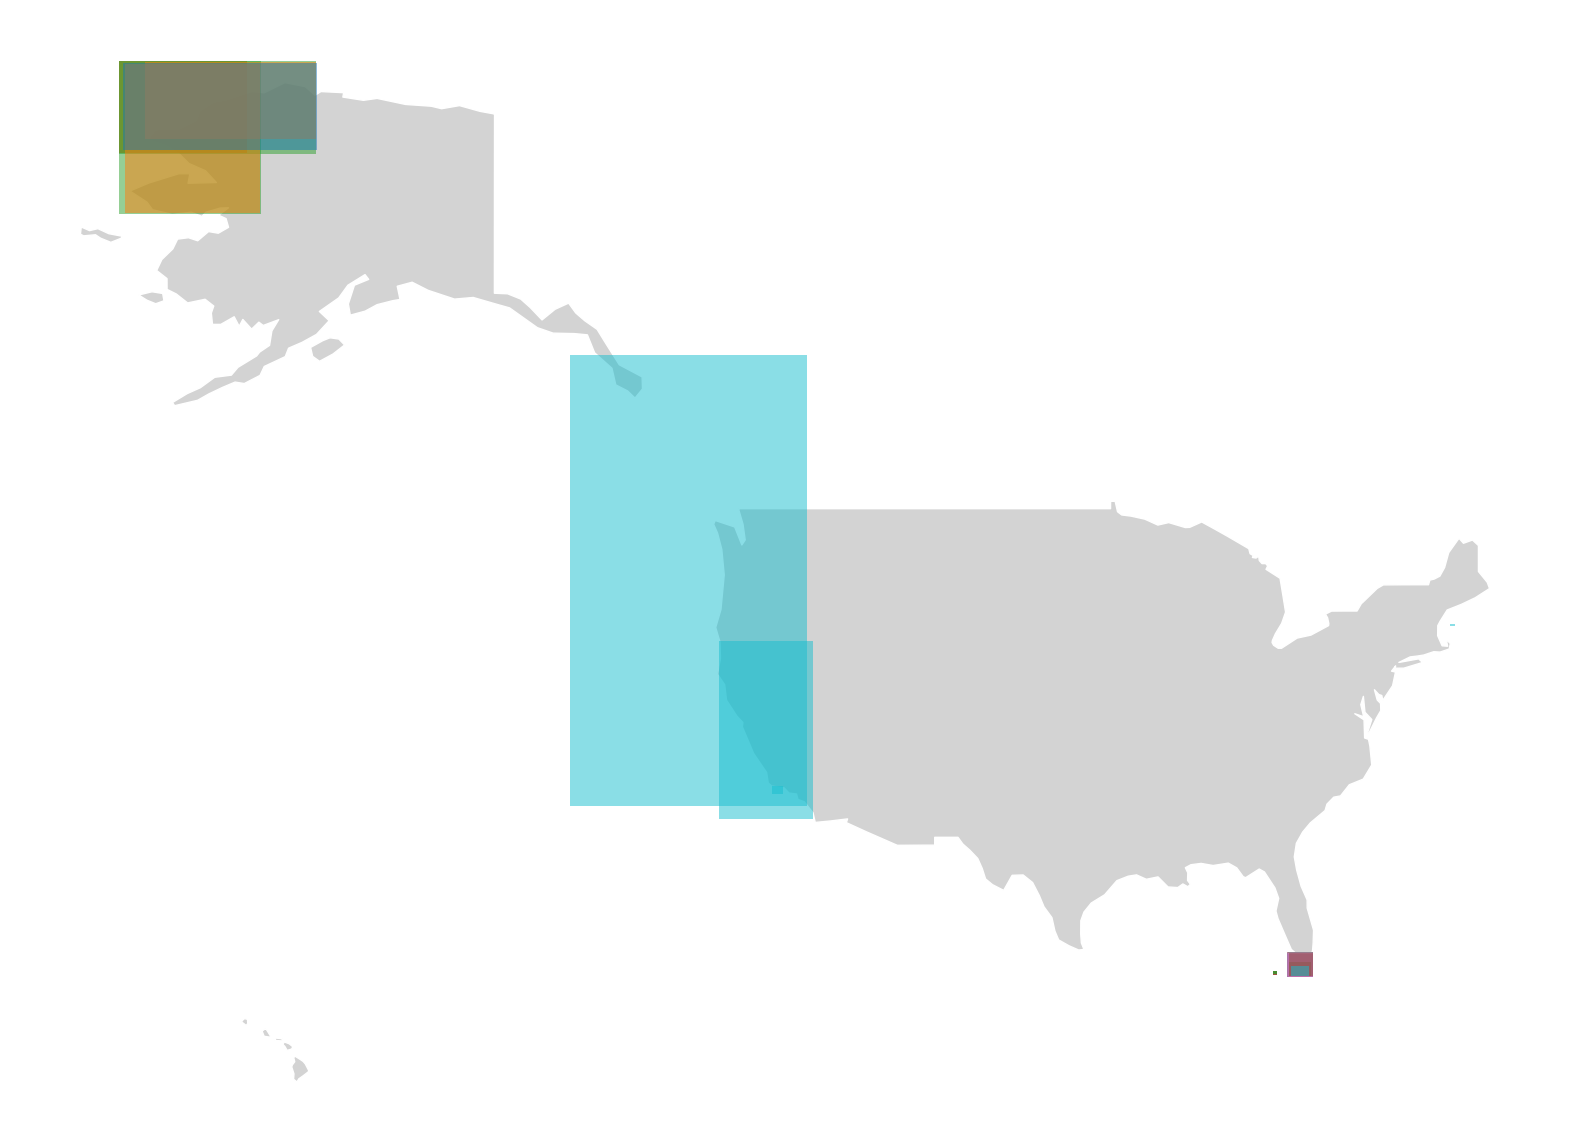

In [187]:
df_meta_1 = df_meta.loc[df_meta['short_name']=='gom_wbts_mesozooplankton']

gdf = geopandas.GeoDataFrame(df_meta)

gdf['geometry'] = geopandas.GeoSeries.from_wkt(gdf['extent'])

gdf.set_crs("epsg:4326", inplace=True)

import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(figsize=(20,15),)# facecolor='lightblue')


#gdf = gdf.set_crs("epsg:4326")
gdf.plot(ax=ax, 
         zorder=10, 
         alpha=0.5, 
         column='short_name', 
         #legend=True,
        )#, markersize=5, zorder=10, legend=True)
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 1.2, 0.9))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(gdf.crs)

world.loc[world['iso_a3']=='USA'].plot(ax=ax, color='lightgrey', edgecolor='white', zorder=1)

now = datetime.now()

today = now.strftime("%Y-%m-%d")

#plt.title("Total unique occurrences contributed to OBIS from the IOOS network as of %s: %i" % (today, cumulative_size ))

ax.set_axis_off();

plt.show()

## Query the OBIS API for appropriate records.

Only return points aggregated to [Geohash precision 8](ref?).

In [188]:
cumulative_size = 0

combined = pd.DataFrame()

dataset_ids = gdf['id']

for datasetid in dataset_ids:

    dset = pyobis.occurrences.getpoints(datasetid = datasetid).execute()
  
    meta = pyobis.dataset.get(id = datasetid).execute()['results'][0]
    short_name = meta['url'].split("=")[-1]

    df = pd.DataFrame(dset)

    df['dataset_id'] = datasetid
    df['short_name'] = meta['url'].split("=")[-1]
    df['url'] = meta['url']
    df['metadata'] = str(meta)
    
    df[['decimalLongitude','decimalLatitude']] = pd.DataFrame(df['coordinates'].tolist())

    combined = pd.concat([combined, df],ignore_index=True)

    size = df.shape[0]

    cumulative_size = cumulative_size + size

    print("Found %i unique coordinates." % size)
    #print("See in mapper at: %s" % dset.mapper_url())

print("\nFound %i total unique coordinates." % cumulative_size )

Found 139 unique coordinates.
Found 943 unique coordinates.
Found 611 unique coordinates.
Found 769 unique coordinates.
Found 788 unique coordinates.
Found 715 unique coordinates.
Found 561 unique coordinates.
Found 664 unique coordinates.
Found 629 unique coordinates.
Found 671 unique coordinates.
Found 596 unique coordinates.
Found 19 unique coordinates.
Found 609 unique coordinates.
Found 644 unique coordinates.
Found 556 unique coordinates.
Found 397 unique coordinates.
Found 302 unique coordinates.
Found 70 unique coordinates.
Found 518 unique coordinates.
Found 385 unique coordinates.
Found 445 unique coordinates.
Found 503 unique coordinates.
Found 221 unique coordinates.
Found 70 unique coordinates.
Found 363 unique coordinates.
Found 336 unique coordinates.
Found 61 unique coordinates.
Found 197 unique coordinates.
Found 337 unique coordinates.
Found 288 unique coordinates.
Found 45 unique coordinates.
Found 210 unique coordinates.
Found 27 unique coordinates.
Found 18 unique 

# Make map of those points

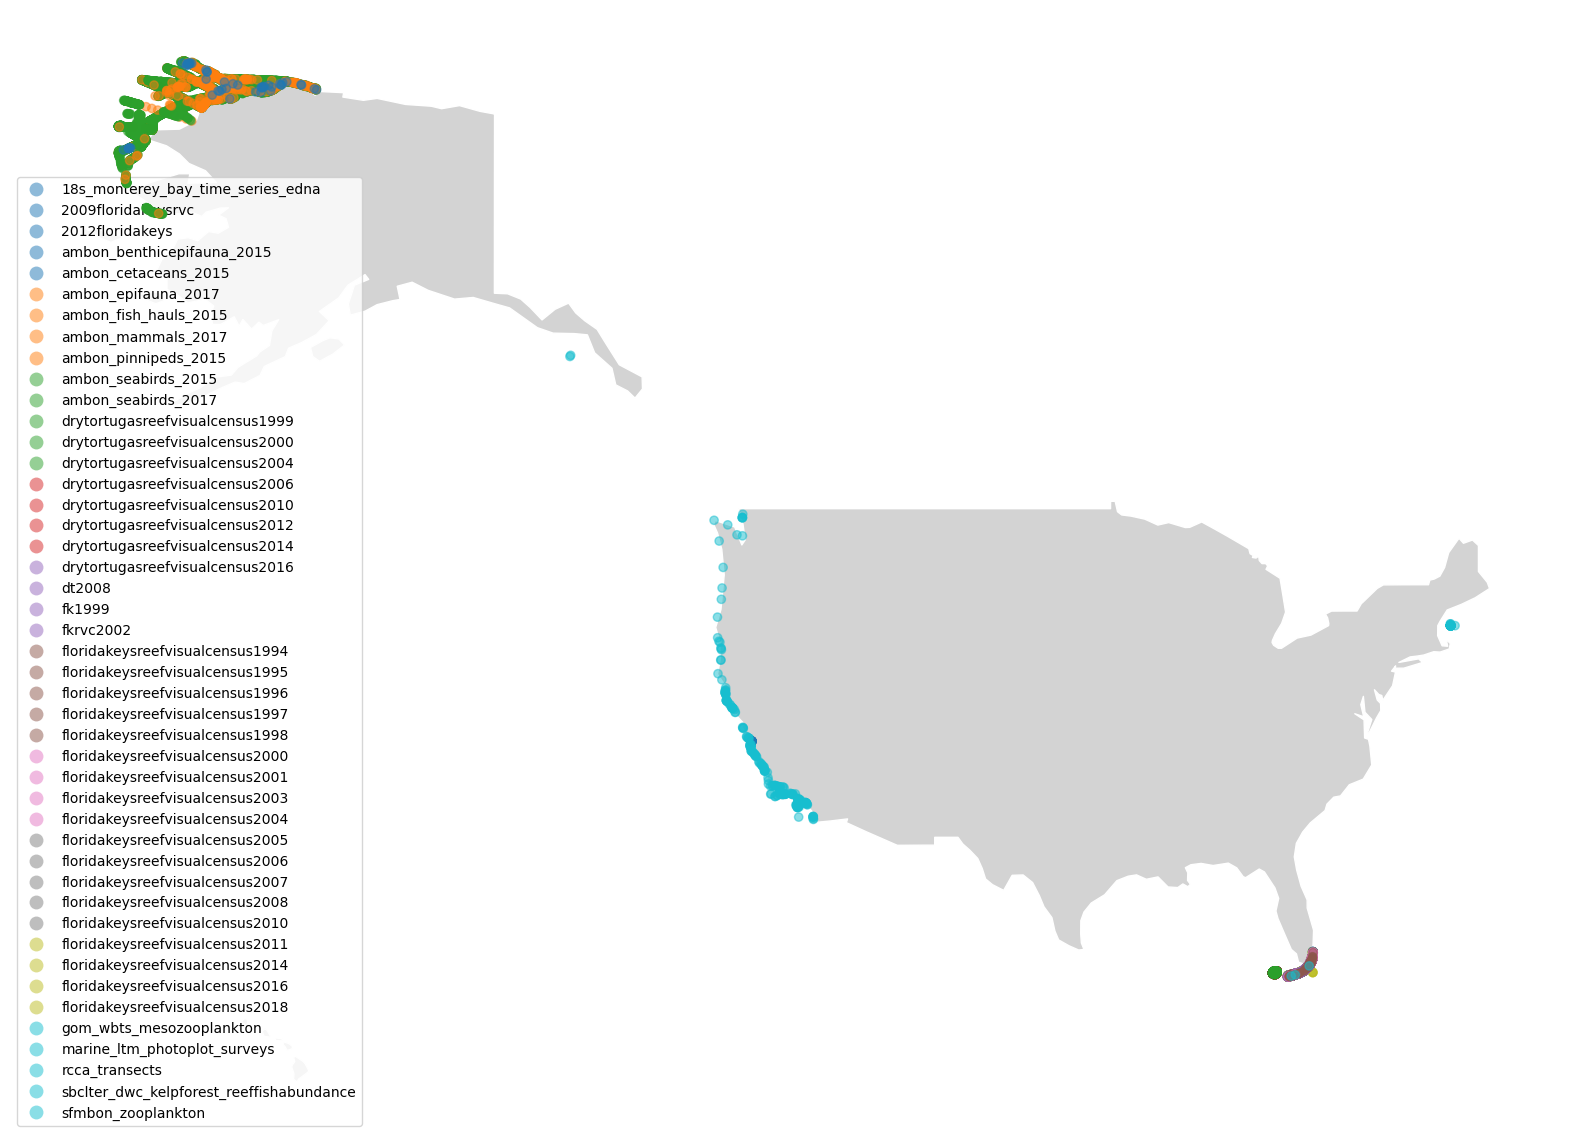

In [191]:
  # read into geopandas dataframe for plotting
gdf_ghsh = geopandas.GeoDataFrame(
    combined[['dataset_id','short_name','decimalLatitude','decimalLongitude']], 
    geometry=geopandas.points_from_xy(combined.decimalLongitude, combined.decimalLatitude),
    crs = "epsg:4326",
    )

import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(figsize=(20,15),)# facecolor='lightblue')


#gdf = gdf.set_crs("epsg:4326")
gdf_ghsh.plot(ax=ax, 
         zorder=10, 
         alpha=0.5, 
         column='short_name', 
         legend=True,
        )#, markersize=5, zorder=10, legend=True)
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 1.2, 0.9))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(gdf.crs)

world.loc[world['iso_a3']=='USA'].plot(ax=ax, color='lightgrey', edgecolor='white', zorder=1)

now = datetime.now()

today = now.strftime("%Y-%m-%d")

#plt.title("Total unique occurrences contributed to OBIS from the IOOS network as of %s: %i" % (today, cumulative_size ))

ax.set_axis_off();

plt.show()

# Make a datashader plot of points

In [130]:
import datashader as ds
import colorcet

cvs = ds.Canvas(plot_width=1000, plot_height=700)
agg = cvs.points(gdf, 'decimalLongitude', 'decimalLatitude')
img = ds.tf.set_background(ds.tf.shade(agg, cmap=colorcet.fire, how='log'), "white")

img

ModuleNotFoundError: No module named 'datashader'

---
# Use pyobis to return _all_ occurrences.

<p style="color:red">This takes a while to run!</p>

In [131]:
cumulative_size = 0

combined = pd.DataFrame()

for datasetid in dataset_ids:
    
    query = pyobis.occurrences.search(datasetid = datasetid)
    dataset = query.execute()

    df = pd.DataFrame(dataset)
    df['dataset_id'] = datasetid

    combined = pd.concat([combined, df],ignore_index=True)

    size = df.shape[0]

    cumulative_size = cumulative_size + size

    print("Found %i unique coordinates." % size)
    print("See in mapper at: %s" % query.mapper_url)

print("\nFound %i total unique coordinates." % cumulative_size )

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 237709/237709
Fetched 237709 records.
Found 237709 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=cfceb150-bbe2-4efb-8682-14cfc7167e7c&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 97617/97617
Fetched 97617 records.
Found 97617 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=d50e0443-4d84-4bd9-a5ad-4d417a7607e2&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 87042/87042
Fetched 87042 records.
Found 87042 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=b4ac3d44-b4bf-49ef-a6e9-e2c02adff2fa&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 85588/85588
Fetc

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 28785/28785
Fetched 28785 records.
Found 28785 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=7238ea93-4e76-463a-82c7-e063157e05a7&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 26600/26600
Fetched 26600 records.
Found 26600 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=49743994-7d38-41ed-a91f-0674bbb182c7&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 23652/23652
Fetched 23652 records.
Found 23652 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=415fc669-4d0a-4b31-8658-bd16c8f08293&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 21282/21282
Fetched 

C:\Users\Mathew.Biddle\AppData\Local\Temp\7\ipykernel_11912\988735870.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  combined = pd.concat([combined, df],ignore_index=True)


Found 4840 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=ab06f0c6-3de3-447a-b339-a8517f2c95ed&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 4511/4511
Fetched 4511 records.
Found 4511 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=d32266b4-d98d-4eed-8207-57dff1f14cc4&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 4183/4183
Fetched 4183 records.
Found 4183 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=69a06619-6cb4-4c8a-8bb2-41f88c5669a1&offset=0&mof=False
Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 2341/2341
Fetched 2341 records.
Found 2341 unique coordinates.
See in mapper at: https://mapper.obis.org/?datasetid=c606c47a-3892-4645-9521-630c9085e59f&offset=0&mof=False
Fetch

# Convert to geopandas DataFrame for plotting.

In [135]:
  # read into geopandas dataframe for plotting
gdf = geopandas.GeoDataFrame(
    combined[['dataset_id','decimalLatitude','decimalLongitude']], 
    geometry=geopandas.points_from_xy(combined.decimalLongitude, combined.decimalLatitude),
    crs = "epsg:4326",
    )

gdf

,dataset_id,decimalLatitude,decimalLongitude,geometry
0,cfceb150-bbe2-4efb-8682-14cfc7167e7c,36.610451,-121.894333,POINT (-121.89433 36.61045)
1,cfceb150-bbe2-4efb-8682-14cfc7167e7c,33.711899,-118.241997,POINT (-118.24200 33.71190)
2,cfceb150-bbe2-4efb-8682-14cfc7167e7c,34.017467,-119.362396,POINT (-119.36240 34.01747)
3,cfceb150-bbe2-4efb-8682-14cfc7167e7c,36.526806,-121.926544,POINT (-121.92654 36.52681)
4,cfceb150-bbe2-4efb-8682-14cfc7167e7c,34.004128,-118.792900,POINT (-118.79290 34.00413)
...,...,...,...,...
2000019,f42a54d2-4283-47c9-a65b-49b34a34e3c2,71.166560,-158.170107,POINT (-158.17011 71.16656)
2000020,f42a54d2-4283-47c9-a65b-49b34a34e3c2,72.367331,-163.509653,POINT (-163.50965 72.36733)
2000021,f42a54d2-4283-47c9-a65b-49b34a34e3c2,71.297328,-160.444888,POINT (-160.44489 71.29733)
2000022,f42a54d2-4283-47c9-a65b-49b34a34e3c2,71.390185,-161.079363,POINT (-161.07936 71.39018)


# Make a datashader plot of points

In [6]:
# import datashader as ds
# import colorcet

# cvs = ds.Canvas(plot_width=1000, plot_height=700)
# agg = cvs.points(gdf, 'decimalLongitude', 'decimalLatitude')
# img = ds.tf.set_background(ds.tf.shade(agg, cmap=colorcet.fire, how='log'), "white")

# img

# Make map of all points colored by dataset short name

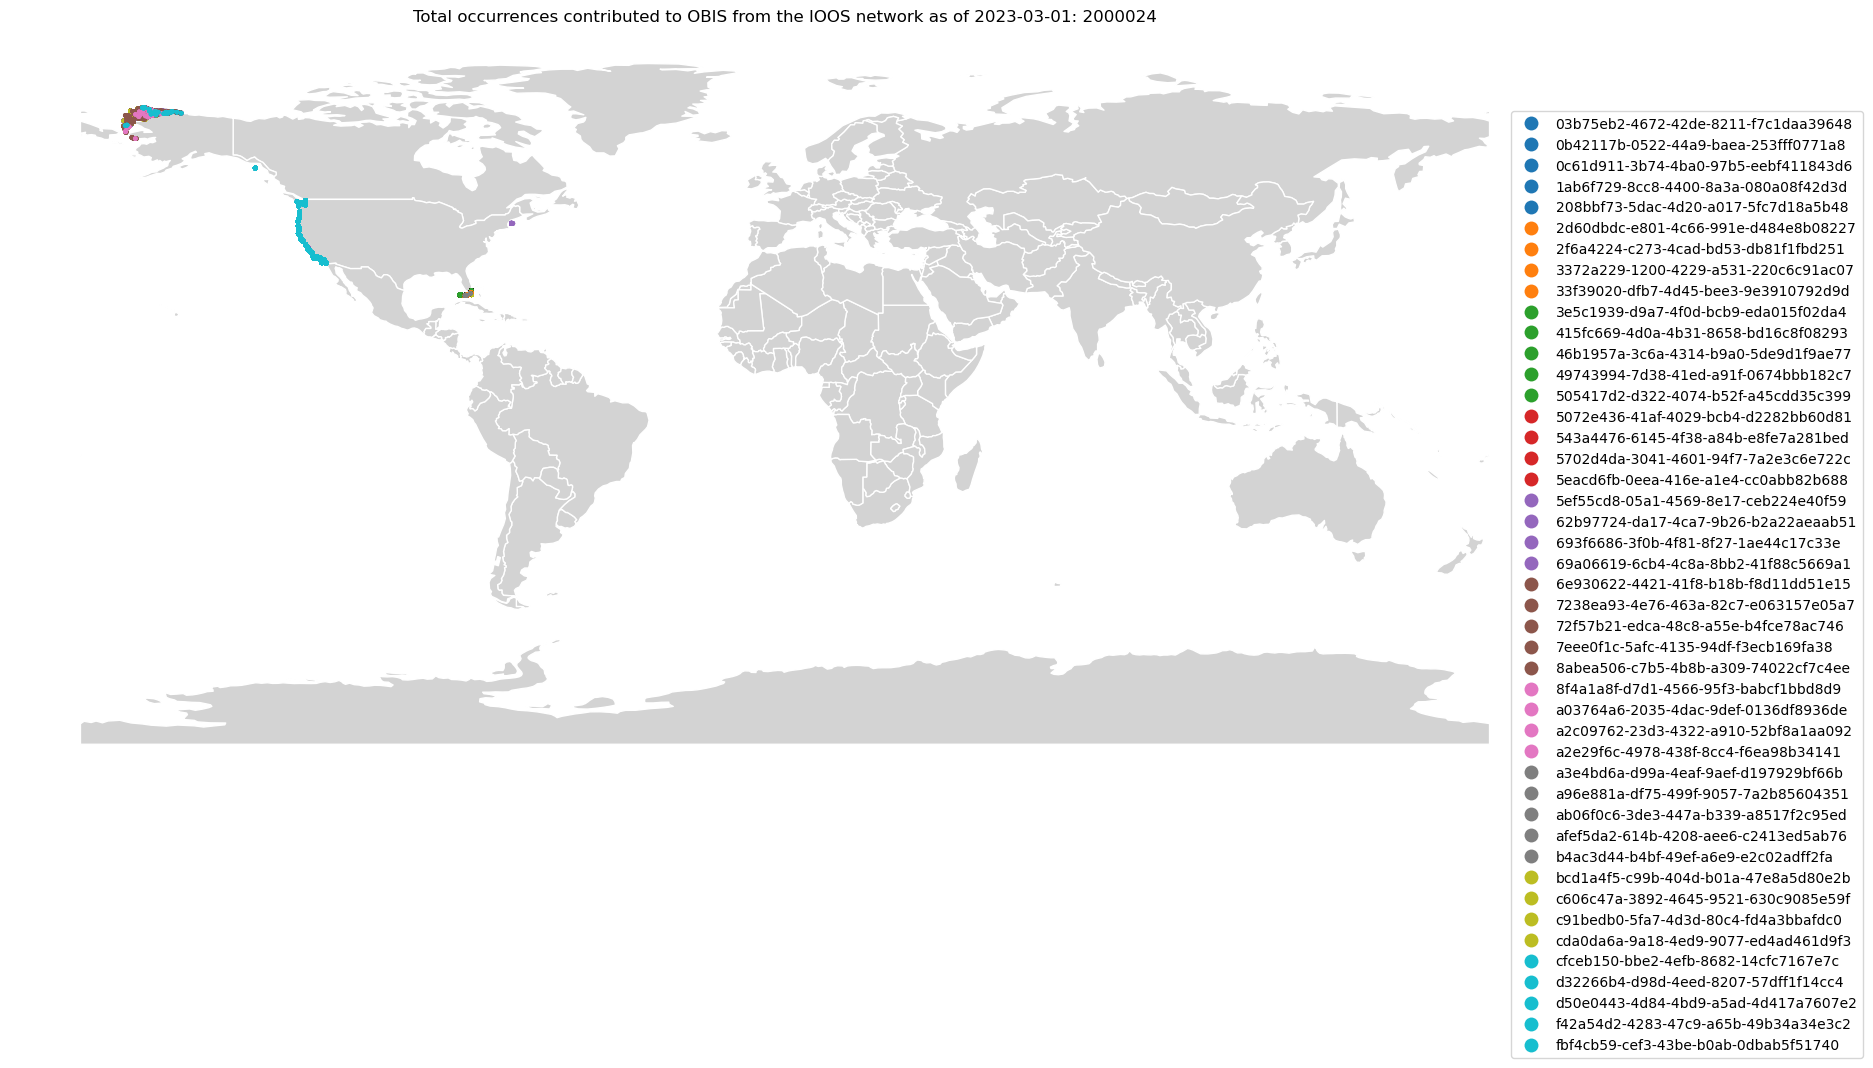

In [136]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(figsize=(20,15),)# facecolor='lightblue')


#gdf = gdf.set_crs("epsg:4326")
gdf.plot(ax=ax, markersize=5, column='dataset_id', zorder=10, legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.2, 0.9))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(gdf.crs)

world.plot(ax=ax, color='lightgrey', edgecolor='white', zorder=1)

now = datetime.now()

today = now.strftime("%Y-%m-%d")

plt.title("Total occurrences contributed to OBIS from the IOOS network as of %s: %i" % (today, cumulative_size ))

ax.set_axis_off();

plt.show()

# Make an interactive map to explore the points.

In [205]:
#gdf.explore(column='short_name', tooltip=True, popup=True,tiles='CartoDB dark_matter')

# Check the institution responses against manually curated list

In [266]:
manual_dataset_ids = ['c9aaa0e9-8f6c-4553-a014-a857baba0680',
 '2ae2a2bd-8412-405b-8a9f-b71adc41d4c5',
 'a54a77db-7b42-4101-8d71-1adec3dd4ed5',
 '36693923-2abf-4237-8154-8016f32844a0',
 '731e318c-d692-4d6b-b4cc-edff0d385098',
 '230e0287-79c3-47f0-9aed-718b63c0a074',
 'fca3b113-b145-446c-a23c-3188090e43af',
 '52f99f08-fc90-4684-aea8-a015150968ea',
 'fbf4cb59-cef3-43be-b0ab-0dbab5f51740',
 '438b8f02-3421-4b2c-a5b2-5934ab76f47b',
 '62125eda-53d3-41bd-ae1f-1b7e0cda2963',
 '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
 'd32266b4-d98d-4eed-8207-57dff1f14cc4',
 'ab06f0c6-3de3-447a-b339-a8517f2c95ed',
 'cfceb150-bbe2-4efb-8682-14cfc7167e7c',
 'afef5da2-614b-4208-aee6-c2413ed5ab76',
 '62b97724-da17-4ca7-9b26-b2a22aeaab51',
 'fbf4cb59-cef3-43be-b0ab-0dbab5f51740',
 '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
 'cfceb150-bbe2-4efb-8682-14cfc7167e7c',
 'c606c47a-3892-4645-9521-630c9085e59f',
 '2d60dbdc-e801-4c66-991e-d484e8b08227',
 '7eee0f1c-5afc-4135-94df-f3ecb169fa38',
 '69a06619-6cb4-4c8a-8bb2-41f88c5669a1',
 'f42a54d2-4283-47c9-a65b-49b34a34e3c2',
 '6e930622-4421-41f8-b18b-f8d11dd51e15',
 'a2e29f6c-4978-438f-8cc4-f6ea98b34141']

set(manual_dataset_ids)

{'230e0287-79c3-47f0-9aed-718b63c0a074',
 '2ae2a2bd-8412-405b-8a9f-b71adc41d4c5',
 '2d60dbdc-e801-4c66-991e-d484e8b08227',
 '36693923-2abf-4237-8154-8016f32844a0',
 '438b8f02-3421-4b2c-a5b2-5934ab76f47b',
 '52f99f08-fc90-4684-aea8-a015150968ea',
 '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
 '62125eda-53d3-41bd-ae1f-1b7e0cda2963',
 '62b97724-da17-4ca7-9b26-b2a22aeaab51',
 '69a06619-6cb4-4c8a-8bb2-41f88c5669a1',
 '6e930622-4421-41f8-b18b-f8d11dd51e15',
 '731e318c-d692-4d6b-b4cc-edff0d385098',
 '7eee0f1c-5afc-4135-94df-f3ecb169fa38',
 'a2e29f6c-4978-438f-8cc4-f6ea98b34141',
 'a54a77db-7b42-4101-8d71-1adec3dd4ed5',
 'ab06f0c6-3de3-447a-b339-a8517f2c95ed',
 'afef5da2-614b-4208-aee6-c2413ed5ab76',
 'c606c47a-3892-4645-9521-630c9085e59f',
 'c9aaa0e9-8f6c-4553-a014-a857baba0680',
 'cfceb150-bbe2-4efb-8682-14cfc7167e7c',
 'd32266b4-d98d-4eed-8207-57dff1f14cc4',
 'f42a54d2-4283-47c9-a65b-49b34a34e3c2',
 'fbf4cb59-cef3-43be-b0ab-0dbab5f51740',
 'fca3b113-b145-446c-a23c-3188090e43af'}

In [267]:
set(df_meta['id'].tolist())

{'03b75eb2-4672-42de-8211-f7c1daa39648',
 '0b42117b-0522-44a9-baea-253fff0771a8',
 '0c61d911-3b74-4ba0-97b5-eebf411843d6',
 '1ab6f729-8cc8-4400-8a3a-080a08f42d3d',
 '208bbf73-5dac-4d20-a017-5fc7d18a5b48',
 '2d60dbdc-e801-4c66-991e-d484e8b08227',
 '2f6a4224-c273-4cad-bd53-db81f1fbd251',
 '3372a229-1200-4229-a531-220c6c91ac07',
 '33f39020-dfb7-4d45-bee3-9e3910792d9d',
 '3e5c1939-d9a7-4f0d-bcb9-eda015f02da4',
 '415fc669-4d0a-4b31-8658-bd16c8f08293',
 '46b1957a-3c6a-4314-b9a0-5de9d1f9ae77',
 '49743994-7d38-41ed-a91f-0674bbb182c7',
 '505417d2-d322-4074-b52f-a45cdd35c399',
 '5072e436-41af-4029-bcb4-d2282bb60d81',
 '543a4476-6145-4f38-a84b-e8fe7a281bed',
 '5702d4da-3041-4601-94f7-7a2e3c6e722c',
 '5eacd6fb-0eea-416e-a1e4-cc0abb82b688',
 '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
 '62b97724-da17-4ca7-9b26-b2a22aeaab51',
 '693f6686-3f0b-4f81-8f27-1ae44c17c33e',
 '69a06619-6cb4-4c8a-8bb2-41f88c5669a1',
 '6e930622-4421-41f8-b18b-f8d11dd51e15',
 '7238ea93-4e76-463a-82c7-e063157e05a7',
 '72f57b21-edca-

# Datasets we manually identified but are not associated with US MBON

In [268]:
missing = pd.DataFrame()
for dsetid in manual_dataset_ids:
    if dsetid not in df_meta['id'].tolist():
        
        meta = pyobis.dataset.get(id = dsetid).execute()['results'][0]
        
        #url = df_meta.loc[df_meta['id']==dsetid,'url'].tolist()
        #print('manual dset {} not in auto list\n\t {}\n\t{}\n'.format(dsetid,meta['url'],meta['title']))
        
        df = pd.DataFrame(data = {'title': [meta['title']], 
                                  'url': [meta['url']]})
        
        missing = pd.concat([missing,df])
pd.set_option('max_colwidth', 400)        
missing

,title,url
0,California Harmful Algal Bloom Monitoring and Alert Program Data (Darwin Core Archive format),https://www1.usgs.gov/obis-usa/ipt/resource?r=calhabmap
0,"NOAA Pacific Islands Fisheries Science Center, Ecosystem Sciences Division, National Coral Reef Monitoring Program: Stratified random surveys (StRS) of reef fish in the U.S. Pacific Islands",https://www1.usgs.gov/obis-usa/ipt/resource?r=ncrmp_nspc_fish_pacific
0,"NOAA Pacific Islands Fisheries Science Center, Ecosystem Science Division Coral Reef Ecosystem Program, Rapid Ecological Assessments of Fish Belt Transect Surveys (BLT) at Coral Reef Sites across the Pacific Ocean from 2000 to 2009",https://www1.usgs.gov/obis-usa/ipt/resource?r=ncrmp_blt_fish_pacific
0,Pacific Reef Assessment and Monitoring Program: Rapid Ecological Assessments of Fish Large-Area Stationary Point Count Surveys (SPC) at Coral Reef Sites across the Pacific Ocean from 2000 to 2007,https://www1.usgs.gov/obis-usa/ipt/resource?r=pifsc_spc_fish_pacific
0,NOAA coral reef monitoring invertebrate data from sites across Micronesia from 2009-09-29 to 2015-09-25,https://www1.usgs.gov/obis-usa/ipt/resource?r=noaa_micronesia_reef_monitoring_invert
0,NOAA coral reef monitoring fish data from sites across Micronesia from 2009-09-29 to 2015-09-25,https://www1.usgs.gov/obis-usa/ipt/resource?r=noaa_micronesia_reef_monitoring_fish
0,NOAA coral reef monitoring benthic data from sites across Micronesia from 2009-09-29 to 2015-09-25,https://www1.usgs.gov/obis-usa/ipt/resource?r=noaa_micronesia_reef_monitoring_benthic
0,Puerto Rico Long-Term Coral Reef Monitoring Program Database Compilation,https://www1.usgs.gov/obis-usa/ipt/resource?r=prcrmp_database
0,MARINe/PISCO: Intertidal: MARINe Long-Term Monitoring Surveys: Sea Stars and Katharina,https://www1.usgs.gov/obis-usa/ipt/resource?r=marine_ltm_seastar_katharina_count
0,United States Geological Survey Nonindigenous Aquatic Species Database,https://www1.usgs.gov/obis-usa/ipt/resource?r=usgs_nas


# Datasets we didn't manually identify, but are associated with US MBON

In [269]:
additional = pd.DataFrame()
for dsetid in df_meta['id'].tolist():
    if dsetid not in manual_dataset_ids:
        
        meta = pyobis.dataset.get(id = dsetid).execute()['results'][0]
        
        #url = df_meta.loc[df_meta['id']==dsetid,'url'].tolist()
        #print('Auto dset {} not in manual list\n\t {}\n\t{}\n'.format(dsetid,meta['url'],meta['title']))
        
        df = pd.DataFrame(data = {'title': [meta['title']], 
                                  'url': [meta['url']]})
        
        additional = pd.concat([additional,df])
        
pd.set_option('max_colwidth', 400)        
additional

,title,url
0,Florida Keys Reef Visual Census 2009,https://www1.usgs.gov/obis-usa/ipt/resource?r=2009floridakeysrvc
0,Dry Tortugas Reef Visual Census 2012,https://www1.usgs.gov/obis-usa/ipt/resource?r=drytortugasreefvisualcensus2012
0,Florida Keys Reef Visual Census 2018,https://www1.usgs.gov/obis-usa/ipt/resource?r=floridakeysreefvisualcensus2018
0,Florida Keys Reef Visual Census 2014,https://www1.usgs.gov/obis-usa/ipt/resource?r=floridakeysreefvisualcensus2014
0,Florida Keys Reef Visual Census 2016,https://www1.usgs.gov/obis-usa/ipt/resource?r=floridakeysreefvisualcensus2016
0,Dry Tortugas Reef Visual Census 2014,https://www1.usgs.gov/obis-usa/ipt/resource?r=drytortugasreefvisualcensus2014
0,Florida Keys Reef Visual Census 2011,https://www1.usgs.gov/obis-usa/ipt/resource?r=floridakeysreefvisualcensus2011
0,Florida Keys Reef Visual Census 2012,https://www1.usgs.gov/obis-usa/ipt/resource?r=2012floridakeys
0,Florida Keys Reef Visual Census 2008,https://www1.usgs.gov/obis-usa/ipt/resource?r=floridakeysreefvisualcensus2008
0,Dry Tortugas Reef Visual Census 2008,https://www1.usgs.gov/obis-usa/ipt/resource?r=dt2008
